## Table of Contents
1. [INTRODUCTION](#INTRODUCTION)
2. [ASK](#ASK)
3. [PREPARE](#PREPARE)
4. [PROCESS](#PROCESS)
5. [ANALYZE](#ANALYZE)
6. [SHARE](#SHARE)
7. [ACT](#ACT)

# **INTRODUCTION**
<a id='INTRODUCTION'></a>

This case study is the Capstone Project of Google Data Analytics Professional Certificate. The 6 steps of Data Analysis is used to present this analysis.


#  **ASK**
<a id='ASK'></a>


Business task:

Analyze all of the Bellabeat's smart devices usage data to offer changes in Bellabeat marketing strategy

Business objectives:

1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3.  How could these trends help influence Bellabeat marketing strategy

Key stakeholders:

1. Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer
2. Sando Mur: Mathematician, Bellabeat’s cofounder and key member of the Bellabeat executive team
3. Bellabeat marketing analytics team: A team of data analysts guiding Bellabeat's marketing strategy.


#  **PREPARE**
<a id='PREPARE'></a>

The data that is used for this analysis is the Fitbit Fitness Tracker Data made available by Mobius stored on Kaggle.
 This dataset is under CC0: Public Domain. The dataset has 18 files in long data format. It contain information about 30 eligible Fitbit users that consented to the submission of personal tracker data. Data informs the reader about minute-level output for physical activity, heart rate, and sleep monitoring, information about daily activity, steps, and heart rate. this data covers a period 4.12.16-5.12.16

A good data source is ROCCC which stands for Reliable, Original, Comprehensive, Current, and Cited.

**ROCCC**:
Reliable - Low: The dataset is uncomplete and biased due to the fact that it is unknown how people were chosen for data collection. If these people had known in advance that the data will be collected they might train harder, live healthier. The sample data is too small. No information about gender or age.
Original - Low: This dataset are collected by Amazon Mechanical Turk, third-party
Comprehensive - Medium: It doesn't contain required information for making decision
Current - Low: The data is outdated, 7 years-old
Cited  - Low: Data collected by third party


I have used RStudio for this project to help process and analyze and for visualization. In order to solve this business task, one of the given 18 datasets were used.

#  **PROCESS**
<a id='PROCESS'></a>

1. Installing packages and importing files with chosen dataset

In [19]:
library(readr)  
library(tidyverse)
library(lubridate)
library(tidyr)
library(ggplot2)
library(skimr)

In [20]:
dailyActivity <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
head(dailyActivity)

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


2. Data cleaning and manipulation

Finding out the basic information of dailyActivity :

- no. of rows and columns
- name of columns
- type of values

In [21]:
#skimming the data
skim_without_charts(dailyActivity)

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,character,ActivityDate,0,1,8,9,0,31,0,NA,NA,NA,NA,NA,NA,NA
2,numeric,Id,0,1,NA,NA,NA,NA,NA,4.855407e+09,2.424805e+09,1503960366,2.320127e+09,4.445115e+09,6.962181e+09,8.877689e+09
3,numeric,TotalSteps,0,1,NA,NA,NA,NA,NA,7.637911e+03,5.087151e+03,0,3.789750e+03,7.405500e+03,1.072700e+04,3.601900e+04
4,numeric,TotalDistance,0,1,NA,NA,NA,NA,NA,5.489702e+00,3.924606e+00,0,2.620000e+00,5.245000e+00,7.712500e+00,2.803000e+01
5,numeric,TrackerDistance,0,1,NA,NA,NA,NA,NA,5.475351e+00,3.907276e+00,0,2.620000e+00,5.245000e+00,7.710000e+00,2.803000e+01
6,numeric,LoggedActivitiesDistance,0,1,NA,NA,NA,NA,NA,1.081709e-01,6.198965e-01,0,0.000000e+00,0.000000e+00,0.000000e+00,4.942142e+00
7,numeric,VeryActiveDistance,0,1,NA,NA,NA,NA,NA,1.502681e+00,2.658941e+00,0,0.000000e+00,2.100000e-01,2.052500e+00,2.192000e+01
8,numeric,ModeratelyActiveDistance,0,1,NA,NA,NA,NA,NA,5.675426e-01,8.835803e-01,0,0.000000e+00,2.400000e-01,8.000000e-01,6.480000e+00
9,numeric,LightActiveDistance,0,1,NA,NA,NA,NA,NA,3.340819e+00,2.040655e+00,0,1.945000e+00,3.365000e+00,4.782500e+00,1.071000e+01


── Data Summary ────────────────────────
                           Values       
Name                       dailyActivity
Number of rows             940          
Number of columns          15           
_______________________                 
Column type frequency:                  
  character                1            
  numeric                  14           
________________________                
Group variables            None         

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 ActivityDate          0             1   8   9     0       31          0

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable            n_missing complete_rate    mean      sd         p0
 1 Id                               0             1 4.86e+9 2.42e+9 1503960366
 2 TotalSteps                       0             1 7.64e+3 5.09e+3          0


In [22]:
# count distinct value of "Id" 

n_distinct(dailyActivity$Id)

[1] 33

Results:

*dailyActivity*

1. File consists *dailyActivity* of 940 rows and 15 columns.
2. There is no Null or missing values.
3. ActivityDate column is classified as character data type, all others are numeric. 
4. There are 33 unique IDs, instead of 30 expected.


Plan of data cleaning and manipulation:

*dailyActivity*

1. Convert *ActivityDate* column to  date type format yyyy-mm-dd.
2. Create new column *DayOfTheWeek* by separating the date into day of the week.
3. Create new column *TotalMins* being the sum of VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes and SedentaryMinutes.
4. Create new column *TotalHours* by converting new column of to TotalMins number of hours.
5. Rearrange columns.

In [23]:
# convert "ActivityDate" to date format yyyy-mm-dd
dailyActivity$ActivityDate <- mdy(dailyActivity$ActivityDate)
# print first 6 rows to confirm
head(dailyActivity)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


In [24]:
#adding new column "DayOfTheWeek" 

dailyActivity <- dailyActivity %>% 
  add_column(DayOfTheWeek = wday(dailyActivity$ActivityDate, label=TRUE))

# print first 5 rows of DayOfTheWeek to confirm the changes
head(dailyActivity$DayOfTheWeek) 

[1] Tue Wed Thu Fri Sat Sun
Levels: Sun < Mon < Tue < Wed < Thu < Fri < Sat

In [25]:
#adding a new column "TotalMins" that is showing total activity minutes

dailyActivity$TotalMins = rowSums(dailyActivity[,c("VeryActiveMinutes", "FairlyActiveMinutes", "LightlyActiveMinutes", "SedentaryMinutes" )])

# print first 5 rows of "TotalMins" to confirm the changes

head(dailyActivity$TotalMins)

[1] 1094 1033 1440  998 1040  761

In [26]:
#adding a new column "TotalHours" that is showing total activity hours

dailyActivity$TotalHours = round(dailyActivity$TotalMins/60)

# print first 5 rows of "TotalHours" to confirm the changes

head(dailyActivity$TotalHours) 

[1] 18 17 24 17 17 13

In [27]:
#rearranging columns

dailyActivity <- dailyActivity[,c(1,2,16,3,4,5,6,7,8,9,10,11,12,13,14,17,18,15)]

# print column names to confirm

colnames(dailyActivity) 

[1] "Id"                       "ActivityDate"            
 [3] "DayOfTheWeek"             "TotalSteps"              
 [5] "TotalDistance"            "TrackerDistance"         
 [7] "LoggedActivitiesDistance" "VeryActiveDistance"      
 [9] "ModeratelyActiveDistance" "LightActiveDistance"     
[11] "SedentaryActiveDistance"  "VeryActiveMinutes"       
[13] "FairlyActiveMinutes"      "LightlyActiveMinutes"    
[15] "SedentaryMinutes"         "TotalMins"               
[17] "TotalHours"               "Calories"

#  **ANALYZE**
<a id='ANALYZE'></a>

In [28]:
#getting statistic information about the dataset

summary(dailyActivity)

       Id             ActivityDate        DayOfTheWeek   TotalSteps   
 Min.   :1.504e+09   Min.   :2016-04-12   Sun:121      Min.   :    0  
 1st Qu.:2.320e+09   1st Qu.:2016-04-19   Mon:120      1st Qu.: 3790  
 Median :4.445e+09   Median :2016-04-26   Tue:152      Median : 7406  
 Mean   :4.855e+09   Mean   :2016-04-26   Wed:150      Mean   : 7638  
 3rd Qu.:6.962e+09   3rd Qu.:2016-05-04   Thu:147      3rd Qu.:10727  
 Max.   :8.878e+09   Max.   :2016-05-12   Fri:126      Max.   :36019  
                                          Sat:124                     
 TotalDistance    TrackerDistance  LoggedActivitiesDistance VeryActiveDistance
 Min.   : 0.000   Min.   : 0.000   Min.   :0.0000           Min.   : 0.000    
 1st Qu.: 2.620   1st Qu.: 2.620   1st Qu.:0.0000           1st Qu.: 0.000    
 Median : 5.245   Median : 5.245   Median :0.0000           Median : 0.210    
 Mean   : 5.490   Mean   : 5.475   Mean   :0.1082           Mean   : 1.503    
 3rd Qu.: 7.713   3rd Qu.: 7.710   3r

Results:

1. Tuesday, Wednesday and Thursday are the days when people use FitBitTracker the most.
2. Most of the logged activity is sedentary. On the average, 991.2 minutes is sedentary, which is more than 81% of total activity minutes. 
3. On average, users  do 7638 steps during logged session, which is  5.475 km. According to National Institute of Health, "Compared with people who took 4,000 steps a day, those who took 8,000 steps a day at the start of the study had a 50% lower risk of dying from any cause during follow-up. People who took 12,000 steps a day had a 65% lower risk of dying than those who took only 4,000." 
4. Average burned calories is 2304. With no information about gender, age, weight, it is impossible to interpret. According to NHS, age, lifestyle, size, hormones. medicines, being unwell can affect how much amount of energy is burning.

# **SHARE**
<a id='SHARE'></a>

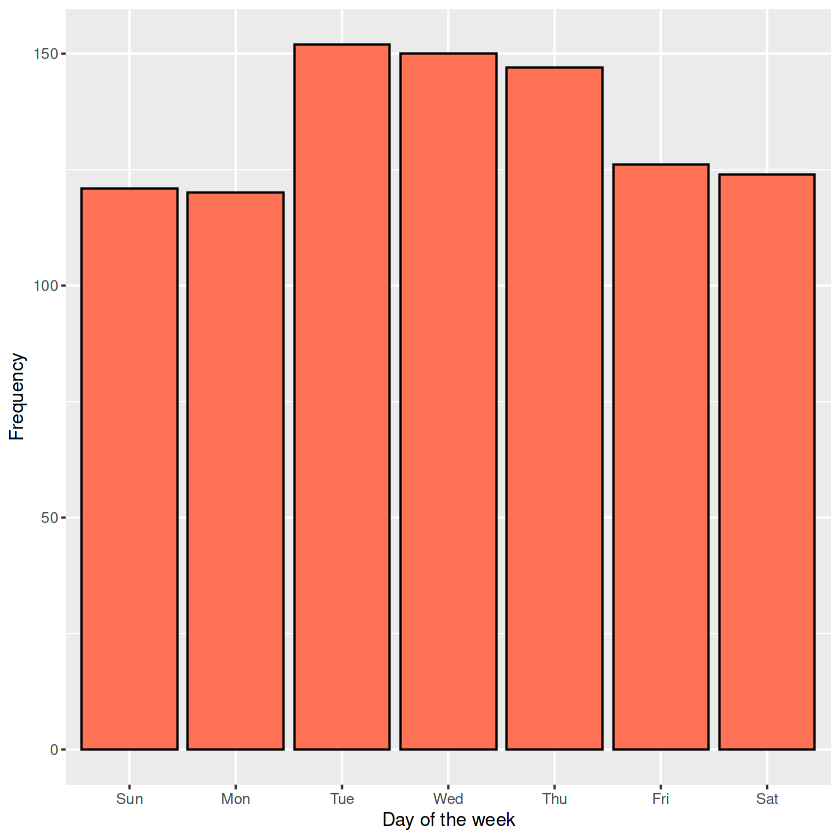

In [31]:
#visualize information about logged activities throughout the week

ggplot(dailyActivity, aes(x=DayOfTheWeek))+ 
geom_bar(fill='coral1',color='black')+
labs(x = "Day of the week", y = "Frequency")

As it might be seen on the bar graph, users tend to use FitBit tracker in the middle of the week.

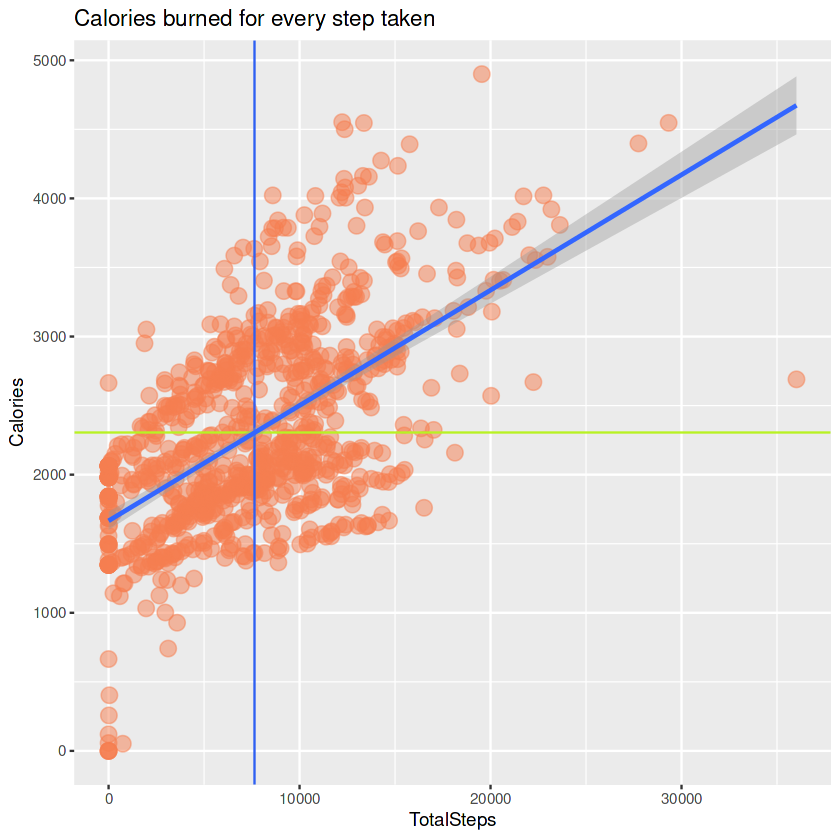

In [53]:
#plotting a scatterplot of calories burned for every step taken

ggplot(dailyActivity, aes(x=TotalSteps, y=Calories)) + 
  geom_point(fill="#F57E51",
             color="#F57E51",
             shape=21,
             alpha=0.5,
             size=4)+
  ggtitle("Calories burned for every step taken")+
  geom_hline(yintercept = mean(dailyActivity$Calories, na.rm=TRUE),color="#B8F222")+
  geom_vline(xintercept = mean(dailyActivity$TotalSteps, na.rm=TRUE),color="#2E5FF2")+
  geom_smooth(method=lm, formula = y ~ x)


Results:
1. It is a positive correlation.
2. It is noticeable that intensity of calories burned increase when users are at the range of > 0 to 15,000 steps with calories burn rate cooling down from 15,000 steps onwards.

In [37]:
#creating a dataframe 

 df <- data.frame (Type = c("Very Active Minutes", "Fairly Active Minutes","Lightly Active Minutes", "Sedentary Minutes"),
                   Sums = c(sum(dailyActivity$VeryActiveMinutes), sum(dailyActivity$FairlyActiveMinutes), sum(dailyActivity$LightlyActiveMinutes), sum(dailyActivity$SedentaryMinutes)))
 df

Type,Sums
<chr>,<dbl>
Very Active Minutes,19895
Fairly Active Minutes,12751
Lightly Active Minutes,181244
Sedentary Minutes,931738


In [39]:
#calculating percentages
sums_all <- sum(df$Sums,na.rm=TRUE)
df <- df %>%
  mutate(Percent = (Sums /sums_all) * 100)

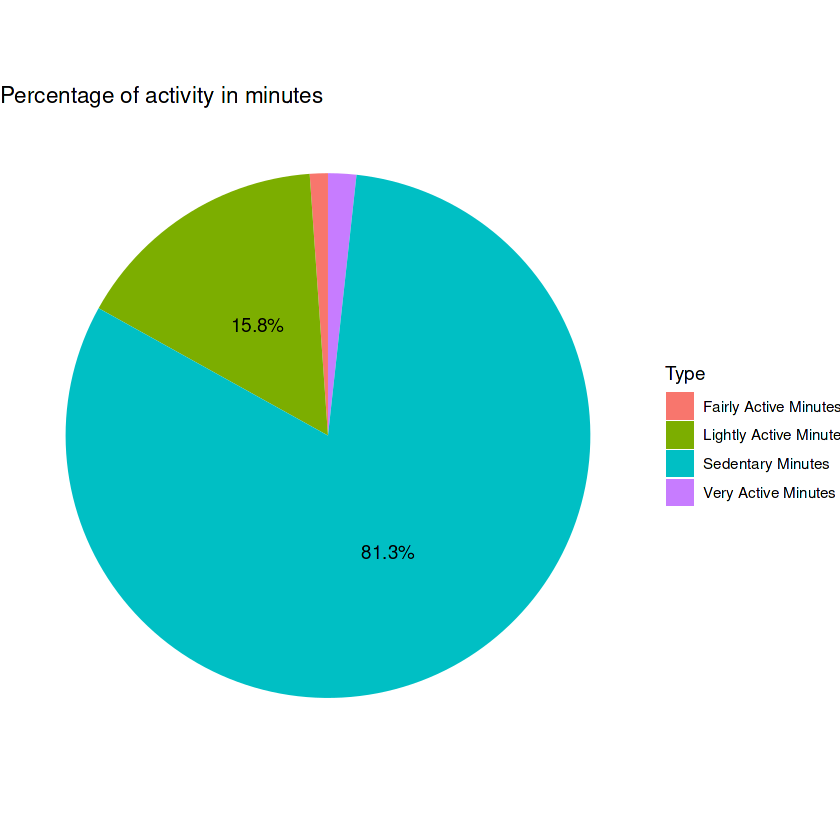

In [42]:
#plotting a pie chart

ggplot(df, aes(x = "", y = Percent, fill = Type)) + 
  geom_bar(stat = "identity", width = 1) + 
  coord_polar(theta = "y") + 
  geom_text(aes(label = ifelse(Percent > 5, paste0(round(Percent, 1), "%"), "")), position = position_stack(vjust = 0.5)) +
  ggtitle("Percentage of activity in minutes") +
  theme_void()

Results:
1. Sedentary minutes takes the biggest slice at 81.3%. This indicates that users are using the FitBit app to log daily activities, for example during working hours, commute time.
2. The smallest slices are fairly active activity (1.1%) and very active activity (1.7%)So users don't use the app as intended to track fitness.  


#  **ACT**
<a id='ACT'></a>

In the final step, we deliver our insights based on our analysis. Remembering our business task, we give recommendations.

1. What are the trends identified?

- Majority of users (81.3%) are using the FitBit app to track sedentary activities.
- Users prefer to track their activities during weekdays as compared to weekends 


2. How could these trends apply to Bellabeat customers?

- -Both companies focus on providing users with tools that help track  habits and fitness activity and encouraging them to make healthy decisions. These trends can be applied to Bellabeat customers, considering the limitations of the data.

3. How could these trends help influence Bellabeat marketing strategy?

- Bellabeat marketing team can include function in Bellabeat app to  encourage users who tends to have a high number to sedentary minutes  to do different types of simple exercises that don't take a lot of time but help to build a habit.
- The marketing team can educate users about fitness benefits,  calories intake and burnt rate information on the Bellabeat app.
- The marketing team can create a rewards system to encourage users to log in on the weekend and have a workout or walk outside.